<a href="https://colab.research.google.com/github/JuliaVazTostes/exercicios-extra/blob/master/Machine_Learning_Exercise_1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **REGRESSÃO LINEAR - MACHINE LEARNING**

### REGRESSÃO LINEAR SIMPLES

**Link para exercício**: https://www.johnwittenauer.net/machine-learning-exercises-in-python-part-1/

Regressão linear é utilizada para modelar o relacionamento entre uma variável dependente e uma ou mais variáveis ​​independentes.
*   Quando há apenas uma variável independente, será chamada de regressão linear simples 
*   Quando houver mais de uma variável independente, será chamada de regressão linear múltipla

O objetivo do exercício é implementar uma regressão linear simples para predição de lucros e uma cadeia de truck food. A análise irá auxiliar na tomada de decisão se deve abrir novas unidades em novas cidades. A cadeia já tem unidades em diversas cidades, então esta disponível os dados sobre a população das cidades e o lucro, e com base nesses dados decidir em quais cidades a expansão da cadeia deve ser feita.

Será criado um modelo linear dos dados X, usando parâmetros theta, que descreve a variação dos dados, de modo que, considerando um novo ponto de dados que não esteja em X, pode-se prever com precisão qual seria o resultado y sem realmente saber o que é y.

Será utilizada uma técnica de otimização para encontrar os parâmetros theta conhecida como gradiente descendente. Há outra maneira de encontrar os parâmetros ideais para um modelo linear chamada "equação normal", que basicamente resolve o problema de uma só vez usando uma série de cálculos matriciais, mas essa abordagem não é dimensionada muito bem para grandes conjuntos de dados. Portanto, para problemas de aprendizado de máquina, essa abordagem é mais prática.



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
# IMPORTAR ARQUIVOS DO GITHUB: Sempre que trabalhamos com arquivos do GitHub, a melhor forma é sempre usar o endereço raw do arquivo. Vá ao repositório, 
# entre no arquivo que deseja abrir -> botão Raw -> copiar o endereço do navegador
# se o arquivo tivesse cabeçalho poderia ser utilizado:

#      dataset_path="https://raw.githubusercontent.com/jdwittenauer/ipython-notebooks/master/data/ex1data1.txt"

#      df = pd.read_csv(dataset_path)

# Mas como não possui, tem que ser montado da seguinte forma:

df = pd.read_csv("https://raw.githubusercontent.com/jdwittenauer/ipython-notebooks/master/data/ex1data1.txt", header=None, names=['Population', 'Profit'])

# mostrar o dataset

df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [34]:
# Resumo estatístico dos dados

df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


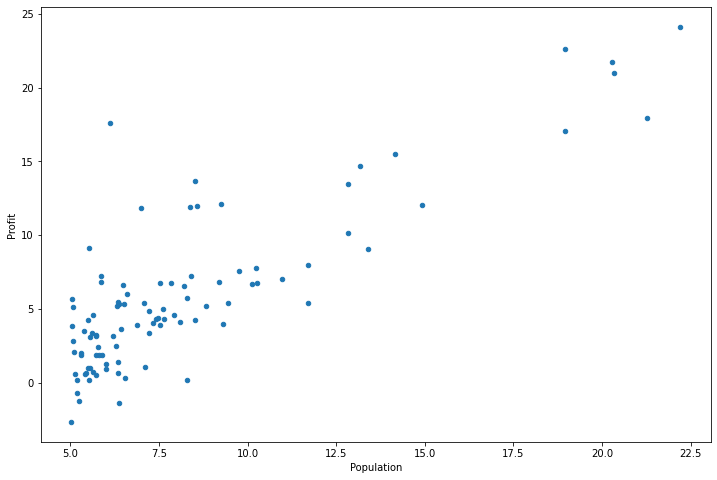

In [35]:
# Plotar o gráfico para entender melhor como o dado se distribui

df.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

In [0]:
# Agora, podemos implementar regressão linear usando um gradiente descendente para minimizar a função custo. 
# O objetivo da regressão linear é minimizar a função custo
# Os parâmetros do modelo são os valroes de theta, e esses serão os valores que serão ajustados para minimizar o custo J(theta). Uma forma de fazer isso é
# utilizando o algoritmo gradiente descendente "batch", onde cada iteração é um update. Em cada passo do gradiente descendente, o valor de theta se aproxima
# mais do valor ótimo para o menor custo ser atingido.

# As equações implementadas nos seguintes exemplos de código estão detalhadas em "ex1.pdf" na pasta "exercícios".

# Primeiro, é necessário criar a função custo de uma dada solução (caracterizada pelos parâmetros theta).
# A função de custo avalia a qualidade do modelo através do calculo do erro entre a previsão feita pelo modelo para um ponto e o valor real desse ponto. 

# Por exemplo, se a população de uma cidade é 4 e o modelo preveu 7, nosso erro é (7-4) ^ 2 = 3 ^ 2 = 9 (assumindo uma função de perda L2 ou "mínimos quadrados"). 
# Isso é feito para cada ponto de X e o resultado é somado para obter o custo. 

def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [0]:
# Observe que não há loops. Estamos aproveitando os recursos de algrebra linear da numpy para calcular o resultado como uma série de operações de matriz. 
# Isso é muito mais eficiente em termos computacionais do que um loop "para" não otimizado.

#  Para a função de custo funcionar perfeitamente com o dataframe criado, é necessário manipular o dataframa. 
# 1) Inserir uma coluna de '1's para fazer com que as operações da matriz funcionem corretamente (basicamente, essa inserção é responsável pela interceptação 
# na equação linear). 
# 2) Separar o dataframe em variáveis ​​independentes (X) e dependente (y).

df.insert(0, 'Ones', 1)

In [0]:
# Agora é necessário fazer inicialização de variável.
# Configurar X (dado de treinamento) e y (variável alvo)

cols = df.shape[1]
X = df.iloc[:,0:cols-1]
y = df.iloc[:,cols-1:cols]

In [39]:
# Conferir X (conjunto de treinamento) e y (variável de destino).
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [40]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [0]:
# A função de custo utiliza matrizes numpy, para isso precisamos converter X e y em matrizes Numpy para podermos usá-las.
# Os valores de X e Y não são valores escalares, e sim matrizes, onde as colunas representam os exemplos do conjunto de treinamento. 
# Também precisamos instanciar o teta.

X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [42]:
# Vamos ver como ficou teta
theta

matrix([[0, 0]])

In [43]:
# Ao depurar operações da matriz é bom sempre observar o "formato das matrizes" com as quais você está lidando. 
# Também é útil lembrar, que multiplicações entre matrizes são: (i x j) * (j x k) = (i x k), onde i, j e k são as dimensões relativas da matriz.

# Ver o formatao das matrizes

X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [44]:
#  Agora pode-se testar a função custo. Os parâmetros foram inicializados como 0, portanto a solução ainda não é ótima, mas podemos ver se funciona.

# Calcular o custo da solução inicial (0 valores para theta).
computeCost(X, y, theta)

32.072733877455676

In [0]:
# Ao utilizar o gradiente descendente, para cada iteração, é calculado o gradiente doerro para descobrir a direção apropriada do vetor de parâmetro. 
# Em outras palavras, calcula-se as alterações a serem feitas nos parâmetros para reduzir o erro, aproximando nossa solução da solução ideal (melhor ajuste).
# Como utilizamos álgebra linear e numpy para a solução, a implementação não é 100% ideal. Existe uma maneira de se livrar desse loop interno e atualizar todos 
# os parâmetros de uma só vez, mas não é o objetivo aqui.

# Agora é necessário definir uma função para executar a o gradiente descendente nos parâmetros theta usando as regras de atualização definidas.

def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [0]:
# Algumas variáveis foram adicionadas. A função de gradiente descendente possui os parâmetros 'alfa' e 'iters'. 
# Alfa é a taxa de aprendizado - é um fator na regra de atualização dos parâmetros que ajuda a determinar a rapidez com que o algoritmo converge para a 
# solução ideal. 
# Iters é apenas o número de iterações. 
# Não há uma regra rígida e rápida sobre como inicializar esses parâmetros e, geralmente, é feito por tentativa e erro.

# Agora que se tem uma maneira de avaliar as soluções e uma maneira de encontrar uma boa solução, é hora de aplicar isso ao conjunto de dados.

# Inicializar as variáveis ​​adicionais - a taxa de aprendizado alfa e o número de iterações a serem executadas.

alpha = 0.01
iters = 1000

In [47]:
# Executar o algoritmo de gradiente descendente para ajustar o parâmetro teta ao conjunto de treinamento.

g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [48]:
# Agora tem-se um vetor do parâmetro que descreve o que acredita-se ser o modelo linear ideal para o conjunto de dados. 
# Uma maneira rápida de avaliar o quão bom é o modelo de regressão é analisar o erro total da nova solução.

# Agora podemos calcular o custo (erro) do modelo treinado usando os parâmetros ajustados.

computeCost(X, y, g)

4.515955503078912

In [0]:
# Esse valor é muito melhor que 32, mas não é uma maneira muito intuitiva de ver isso. Para isso temos outras técnicas à nossa disposição.

Text(0.5, 1.0, 'Lucro Previsto x Tamanho da População')

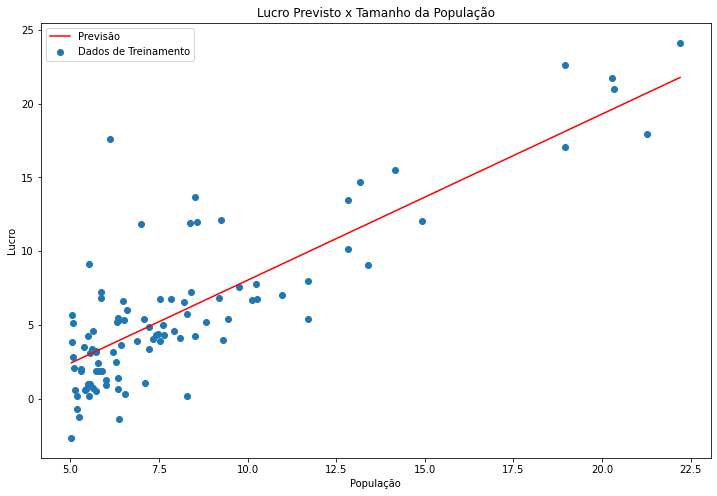

In [50]:
# Plotar o modelo linear com os dados para ver como ele se encaixa -> sobrepor uma linha que representa o modelo em cima do gráfico de dispersão dos dados 
# para ver como eles se encaixam. 

# Podemos usar a função "linspace" da numpy para criar uma série de pontos com espaçamento uniforme dentro do intervalo de nossos dados e, em seguida, 
# "avaliar" esses pontos usando nosso modelo para ver qual seria o lucro esperado. Podemos então transformá-lo em um gráfico de linhas e plotá-lo.

x = np.linspace(df.Population.min(), df.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Previsão')
ax.scatter(df.Population, df.Profit, label='Dados de Treinamento')
ax.legend(loc=2)
ax.set_xlabel('População')
ax.set_ylabel('Lucro')
ax.set_title('Lucro Previsto x Tamanho da População')

Text(0.5, 1.0, 'Erro x Treinamento')

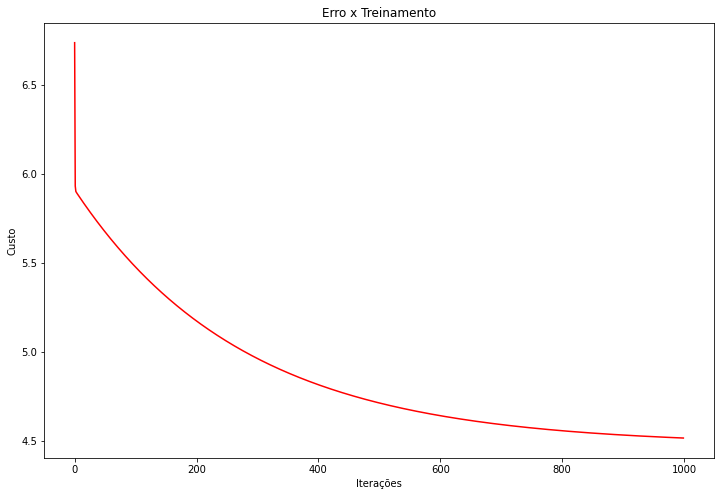

In [51]:
# A função de gradiente descendente também gera um vetor com o custo em cada iteração de treinamento, que  também pode ser plotado. 

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterações')
ax.set_ylabel('Custo')
ax.set_title('Erro x Treinamento')

In [0]:
# Observe que o custo sempre diminui - este é um exemplo do que é chamado de problema de otimização convexa. Se você plotar todo o espaço da solução para 
# o problema (ou seja, plotar o custo em função dos parâmetros do modelo para todos os valores possíveis dos parâmetros), verá que ele se parece com uma 
# "tigela", com uma "bacia" representando a solução ideal.

### REGRESSÃO LINEAR MÚLTIPLA

Agora vamos analisar um dataset com mais de uma variável. O dataset é um conjunto de dados de preços de casas com 2 variáveis ​​(tamanho da casa em pés quadrados e número de quartos) e uma meta (preço da casa). Vamos usar as técnicas já aplicadas para analisar esse conjunto de dados.



In [53]:
# IMPORTAR ARQUIVOS DO GITHUB: como não possui cabeçalho, é necessário montá-lo:

df2 = pd.read_csv("https://raw.githubusercontent.com/jdwittenauer/ipython-notebooks/master/data/ex1data2.txt", header=None, names=['Tamanho', 'N_quartos', 'Preço'])

# mostrar o dataset

df2.head()

,Tamanho,N_quartos,Preço
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [54]:
# Para este exercício é necessário realizar outra etapa de pré-processamento, a normalização dos dados, o que é muito fácil utilizando a biblioteca pandas.

df2 = (df2 - df2.mean()) / df2.std()
df2.head()

,Tamanho,N_quartos,Preço
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [55]:
# Agora basta repetir as etapas de pré-processamento realizadas para a regressão simples, executando o procedimento de regressão linear no novo dataframe.

# Adicionar a coluna de 'uns'
df2.insert(0, 'Ones', 1)

# configurar X (conjunto de treinamento) and y (variável alvo)
cols = df2.shape[1]
X2 = df2.iloc[:,0:cols-1]
y2 = df2.iloc[:,cols-1:cols]

# Converter para matrizes e iniciar o theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# Executar a regressão linear utilizando o conjunto de dados
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# obter o custo (erro) do modelo
computeCost(X2, y2, g2)

0.13070336960771892

Text(0.5, 1.0, 'Erro x Treinamento')

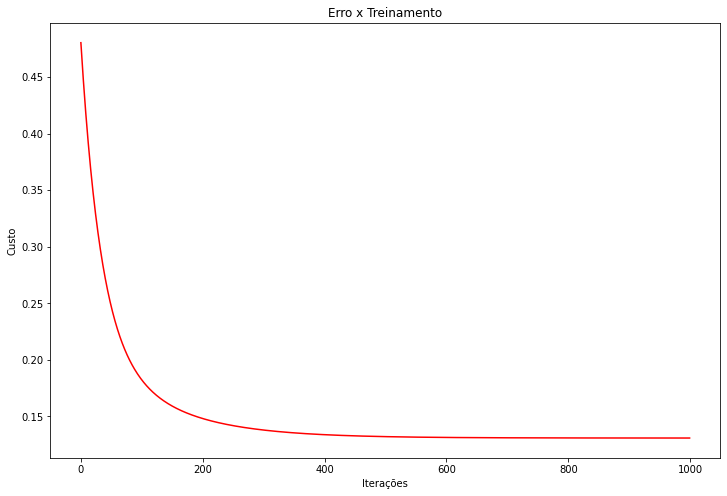

In [56]:
# Conferir o andamento do treinamento através de um gráfico

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterações')
ax.set_ylabel('Custo')
ax.set_title('Erro x Treinamento')

In [57]:
# Ao invés de implementar esses algoritmos do zero, também pode-se usar a função de regressão linear 'scikit-learn'. 
# Ao aplicar o algoritmo de regressão linear 'scikit-learn' aos dados da parte 1 o que retorna é:

from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 1.0, 'Lucro Previsto x População')

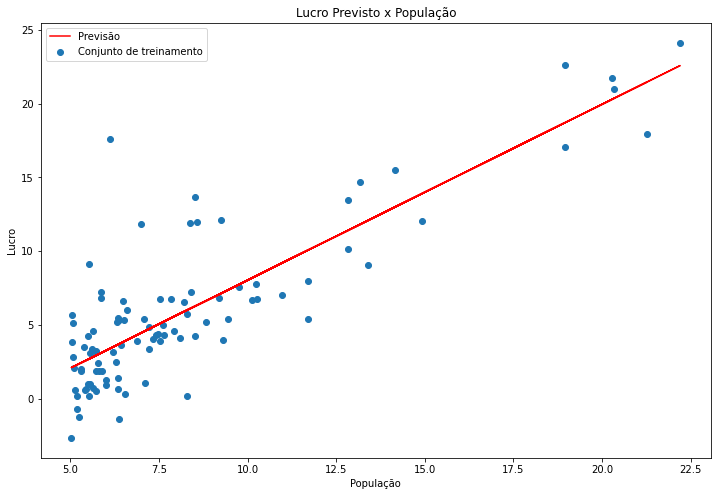

In [58]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Previsão')
ax.scatter(df.Population, df.Profit, label='Conjunto de treinamento')
ax.legend(loc=2)
ax.set_xlabel('População')
ax.set_ylabel('Lucro')
ax.set_title('Lucro Previsto x População')
